In [ ]:
!pip install pytreebank
import pytreebank
import sys
import os

out_path = os.path.join(sys.path[0], 'sst_{}.csv')
dataset = pytreebank.load_sst('./raw_data')

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1,
                item.to_labeled_lines()[0][1]
            ))
# Print the length of the training set
print(len(dataset['train']))

  Created wheel for pytreebank: filename=pytreebank-0.2.7-cp37-none-any.whl size=37070 sha256=a0bd94c3f807d9d262a78d99f331c676621b3fec46680162079cd050006aa463
  Stored in directory: /root/.cache/pip/wheels/e0/b6/91/e9edcdbf464f623628d5c3aa9de28888c726e270b9a29f2368
Successfully built pytreebank
8544


In [ ]:
import pandas as pd
df_dev = pd.read_csv("sst_dev.csv",delimiter="\t",names = ["label","text"])
df_dev.to_csv("sst_dev.csv",index=False)

In [ ]:
import pandas as pd
df_test = pd.read_csv("sst_test.csv",delimiter="\t",names = ["label","text"])
df_test.to_csv("sst_test.csv",index=False)

In [ ]:
#Train data
import pandas as pd
df = pd.read_csv("sst_train.csv",delimiter="\t",names = ["label","text"])
df.head(10)

,label,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .
5,5,Whether or not you 're enlightened by any of D...
6,5,Just the labour involved in creating the layer...
7,4,Part of the charm of Satin Rouge is that it av...
8,5,a screenplay more ingeniously constructed than...
9,4,`` Extreme Ops '' exceeds expectations .


Text(0, 0.5, 'Label')

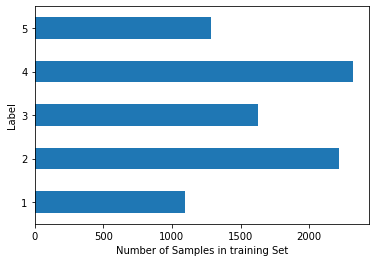

In [ ]:
import matplotlib.pyplot as plt
ax = df['label'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")

In [ ]:
import random
import numpy as np
!pip install -q google_trans_new 
from google_trans_new import google_translator

def back_translate(sequence, PROB = 1):
    languages = ['en','fr','tr'] #'ur', 'ru', 'bg', 'de', 'ar', 'zh-cn', 'hi','sw', 'vi', 'es', 'el']
    
    #instantiate translator
    translator = google_translator()
    
    #store original language so we can convert back
    org_lang = 'en'
    
    #randomly choose language to translate sequence to  
    random_lang = np.random.choice([lang for lang in languages if lang is not org_lang])
    
    if org_lang in languages:
        #translate to new language and back to original
        translated = translator.translate(sequence, lang_tgt = random_lang)
        #translate back to original language
        translated_back = translator.translate(translated, lang_tgt = org_lang)
        output_sequence = translated_back
            
    #if detected language not in our list of languages, do nothing
    else:
        output_sequence = sequence
    
    return output_sequence

In [ ]:
#df["New_text"] = df.apply(lambda x: (back_translate(x["text"])),axis=1)

In [ ]:
# #Creating augmented data - for every sample 3 more data sample are augmented
# import timeit

# start = timeit.default_timer()
# df_augmented = pd.DataFrame()
# li = []
# l = []
# for j in range(0,len(df)+1):
#   output = back_translate(df.text[j])
#   li.append(output)
#   l.append(df.label[j])
#   if j%200 == 0:
#     print(j)

# df_augmented = pd.DataFrame(list(zip(l,li)),
#                columns =['label', 'text'])

# #sample1.reset_index(inplace=True)
# print(df_augmented.head())

# stop = timeit.default_timer()
# print('Time: ', stop - start)   

In [ ]:
def random_deletion(words, p=0.2):

    words = words.split()
    
    #obviously, if there's only one word, don't delete it
    if len(words) == 1 :
        return words

    #randomly delete words with probability p
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    #if you end up deleting all words, just return a random word
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return [words[rand_int]]

    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:
s = "The Rock is destined to be the 21st Century"
random_deletion(s, p=0.2)

'The Rock is destined be the 21st Century'

In [ ]:
df["New_text_del"] = df.apply(lambda x: random_deletion(x["text"],0.2) , axis=1)

In [ ]:
df

,label,text,New_text_del
0,4,The Rock is destined to be the 21st Century 's...,The Rock destined be the 21st 's new Conan and...
1,5,The gorgeously elaborate continuation of `` Th...,gorgeously elaborate continuation of `` The Lo...
2,4,Singer/composer Bryan Adams contributes a slew...,Singer/composer Adams contributes slew songs f...
3,3,You 'd think by now America would have had eno...,You by now America would have had enough of pl...
4,4,Yet the act is still charming here .,Yet the still charming here
...,...,...,...
8539,1,A real snooze .,A real snooze .
8540,2,No surprises .,No surprises .
8541,4,We 've seen the hippie-turned-yuppie plot befo...,We 've seen the hippie-turned-yuppie plot befo...
8542,1,Her fans walked out muttering words like `` ho...,Her fans walked out muttering words like `` ho...


In [ ]:
def swap_word(new_words):
    
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        
        if counter > 3:
            return new_words
    
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

def random_swap(words, n):
    
    words = words.split()
    new_words = words.copy()
    
    for _ in range(n):
        new_words = swap_word(new_words)
        
    sentence = ' '.join(new_words)
    
    return sentence

In [ ]:
s = "The Rock is destined to be the 21st Century"
random_swap(s, 3)

'The Rock is destined to be Century 21st the'

In [ ]:
df["New_text_swap"] = df.apply(lambda x: random_swap(x["text"],2) , axis=1)

In [ ]:
df

,label,text,New_text_del,New_text_swap
0,4,The Rock is destined to be the 21st Century 's...,The Rock destined be the 21st 's new Conan and...,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...,gorgeously elaborate continuation of `` The Lo...,The huge elaborate continuation of that The Lo...
2,4,Singer/composer Bryan Adams contributes a slew...,Singer/composer Adams contributes slew songs f...,few Bryan Adams contributes a slew of songs --...
3,3,You 'd think by now America would have had eno...,You by now America would have had enough of pl...,You with British by now America would have had...
4,4,Yet the act is still charming here .,Yet the still charming here,Yet the here is still act charming .
...,...,...,...,...
8539,1,A real snooze .,A real snooze .,real snooze A .
8540,2,No surprises .,No surprises .,No surprises .
8541,4,We 've seen the hippie-turned-yuppie plot befo...,We 've seen the hippie-turned-yuppie plot befo...,We 've seen the hippie-turned-yuppie plot befo...
8542,1,Her fans walked out muttering words like `` ho...,Her fans walked out muttering words like `` ho...,but fans walked out muttering words like `` ho...


In [ ]:
df1_del = df[["label","New_text_del"]]
df1_del = df1_del.rename(columns={"New_text_del": "text"})
df1_swap = df[["label","New_text_swap"]]
df1_swap = df1_swap.rename(columns={"New_text_swap": "text"})
df_combined = pd.concat([df1_del,df1_swap],axis=0)

In [ ]:
df_combined.shape


(17088, 2)

In [ ]:
df_final = df[["label","text"]]
df_final = pd.concat([df_final,df_combined],axis=0)

In [ ]:
df_final

,label,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .
...,...,...
8539,1,real snooze A .
8540,2,No surprises .
8541,4,We 've seen the hippie-turned-yuppie plot befo...
8542,1,but fans walked out muttering words like `` ho...


In [ ]:
df_final["len"] = df_final['text'].apply(len)
df_final = df_final[df_final.len > 2]
df_final.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_final = df_final[["label","text"]]

In [ ]:
df_final.reset_index(inplace=True)

In [ ]:
df_final = df_final[["label","text"]]

In [ ]:
df_final.to_csv("df_final_train.csv",index=False)

In [ ]:
#Test Data
import pandas as pd
df_test = pd.read_csv("sst_test.csv",delimiter="\t",names = ["label","text"])

In [ ]:
# import matplotlib.pyplot as plt
# ax = df_test['label'].value_counts(sort=True).plot(kind='barh')
# ax.set_xlabel("Number of Samples in training Set")
# ax.set_ylabel("Label")

In [ ]:
import random
import torch, torchtext
from torchtext.legacy import data

In [ ]:
# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [ ]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt') 
def cleanup_text(texts):
    cleaned_text = []
    for text in texts:
        # remove punctuation
        text = re.sub('[^a-zA-Z0-9]', ' ', text)
        # remove multiple spaces
        text = re.sub(r' +', ' ', text)
        # remove newline
        text = re.sub(r'\n', ' ', text)
        text = str(text).lower()
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
        text = re.sub('@[^\s]+', 'ATUSER', text) # remove usernames
        text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
        text = re.sub('[^A-Za-z0-9]+', ' ', text) # remove # and numbers
        cleaned_text.append(text)
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
Text = torchtext.legacy.data.Field(preprocessing=cleanup_text, sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)
Label = torchtext.legacy.data.LabelField(tokenize ='spacy', is_target=True, batch_first =True, sequential =False)

In [ ]:
fields = [('label', Label),('text', Text)]


In [ ]:
train_ds, valid_ds, test_ds = data.TabularDataset.splits(
  path = '.',
  train = 'df_final_train.csv',
  validation = 'sst_dev.csv',
  test = 'sst_test.csv',
  format = 'csv',
  fields = fields,
  skip_header=True
)


In [ ]:
print(vars(train_ds[0]))

{'label': '4', 'text': ['the', 'rock', 'is', 'destined', 'to', 'be', 'the', '21st', 'century', ' s', 'new', ' ', ' ', 'conan', ' ', 'and', 'that', 'he', ' s', 'going', 'to', 'make', 'a', 'splash', 'even', 'greater', 'than', 'arnold', 'schwarzenegger', ' ', 'jean', ' ', 'claud', 'van', 'damme', 'or', 'steven', 'segal', ' ']}


In [ ]:
len(train_ds), len(test_ds)

(24885, 2210)

In [ ]:
Text.build_vocab(train_ds,max_size=5000)
Label.build_vocab(train_ds)
vocab_size = len(Text.vocab)

In [ ]:
print('Size of input vocab : ', len(Text.vocab))
print('Size of label vocab : ', len(Label.vocab))
print('Top 10 words appreared repeatedly :', list(Text.vocab.freqs.most_common(10)))
print('Labels : ', Label.vocab.stoi)

Size of input vocab :  5002
Size of label vocab :  5
Top 10 words appreared repeatedly : [(' ', 60319), ('the', 20334), ('a', 14666), ('and', 12478), ('of', 12357), ('to', 8527), ('is', 7091), (' s', 7058), ('it', 6737), ('that', 5411)]
Labels :  defaultdict(None, {'4': 0, '2': 1, '3': 2, '5': 3, '1': 4})


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_iterator, valid_iterator = torchtext.legacy.data.BucketIterator.splits((train_ds, test_ds), batch_size = 16, 
                                                            sort_key = lambda x: len(x.text),
                                                            sort_within_batch=True, device = device)

In [ ]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Text.vocab.stoi, tokens)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim1, hidden_dim2, output_dim, n_layers,
                 bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(embedding_dim,
                            hidden_dim1,
                            num_layers=n_layers,
                            bidirectional=bidirectional,
                            batch_first=True)
        self.fc1 = nn.Linear(hidden_dim1*2 , hidden_dim2)
        self.fc2 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)

        cat = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        rel = self.relu(cat)
        dense1 = self.fc1(cat)
        drop = self.dropout(dense1)
        preds = self.fc2(drop)
        # Final activation function softmax
        output = F.softmax(preds, dim=1)
            
        return output

In [ ]:
lr = 1e-4
batch_size = 16
embedding_dim = 512
dropout_keep_prob = 0.5
seed = 42
output_dim = 5
hidden_dim1 = 256
hidden_dim2 = 128
n_layers = 2  # LSTM layers
bidirectional = True 
size_of_vocab = len(Text.vocab)
model = LSTM(size_of_vocab, embedding_dim, hidden_dim1, hidden_dim2, output_dim, n_layers, bidirectional, dropout_keep_prob)

In [ ]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

LSTM(
  (embedding): Embedding(5002, 512)
  (encoder): LSTM(512, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)
The model has 5,781,253 trainable parameters


In [ ]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        text, text_lengths = batch.text
            
            # convert to 1d tensor
        predictions = model(text, text_lengths).squeeze()
        
        # compute the loss
        loss = criterion(predictions, batch.label)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.label)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            text, text_lengths = batch.text
            
            # convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 10
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Train Loss: 1.540 | Train Acc: 33.60%
	 Val. Loss: 1.530 |  Val. Acc: 35.52% 

	Train Loss: 1.415 | Train Acc: 47.84%
	 Val. Loss: 1.502 |  Val. Acc: 37.23% 

	Train Loss: 1.318 | Train Acc: 58.44%
	 Val. Loss: 1.511 |  Val. Acc: 37.77% 

	Train Loss: 1.236 | Train Acc: 66.92%
	 Val. Loss: 1.512 |  Val. Acc: 37.50% 

	Train Loss: 1.178 | Train Acc: 72.79%
	 Val. Loss: 1.513 |  Val. Acc: 37.68% 

	Train Loss: 1.130 | Train Acc: 77.64%
	 Val. Loss: 1.518 |  Val. Acc: 37.10% 

	Train Loss: 1.102 | Train Acc: 80.35%
	 Val. Loss: 1.509 |  Val. Acc: 38.22% 

	Train Loss: 1.078 | Train Acc: 82.71%
	 Val. Loss: 1.526 |  Val. Acc: 36.87% 

	Train Loss: 1.061 | Train Acc: 84.51%
	 Val. Loss: 1.522 |  Val. Acc: 37.05% 

	Train Loss: 1.048 | Train Acc: 85.68%
	 Val. Loss: 1.520 |  Val. Acc: 37.41% 

